In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# Load the data from the file on Google Drive
data_file_path = '/content/drive/MyDrive/data.txt'
data = pd.read_csv(data_file_path, sep='\t', header=None)

# Extract features (x1 and x2) and labels (y1 and y2)
features = data.iloc[:, :2].values
labels = data.iloc[:, 2:].values

# Divide the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
features[4,1]

0.865894545727409

In [7]:
labels[10,0]

0

model22 is the actual model we have in C code. Here I am using Google Colab and it is going to take a lot of time to reach the accuray we had in C code beacuse it needs 10000 epochs. So skip this mode go to the model2 where we have more hidden layers and it is easier to get the accuracy we are looking for, even it will be more likely to have overfitting.

In [ ]:
# Define the neural network architecture (model22 with tanh activation)
model22 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),    # Input layer with two inputs (features x1 and x2)
    tf.keras.layers.Dense(20, activation='tanh'),    # First hidden layer with 20 neurons and tanh activation
    tf.keras.layers.Dense(40, activation='tanh'),    # Second hidden layer with 40 neurons and tanh activation
    tf.keras.layers.Dense(2, activation='sigmoid')   # Output layer with two outputs (labels y1 and y2) and softmax activation
])

# Compile the model22 with SGD optimizer and learning rate of 0.005
learning_rate = 0.005
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model22.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network (model22)
epochs = 10000
batch_size = 64
history22 = model22.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate the model22 on the validation set
val_loss, val_accuracy = model22.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}")

In [8]:
# Define the neural network architecture (model2)
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),    # Input layer with two inputs (features x1 and x2)
    tf.keras.layers.Dense(50, activation='relu'),    # First hidden layer with 50 neurons and ReLU activation
    tf.keras.layers.Dense(40, activation='relu'),    # Second hidden layer with 40 neurons and ReLU activation
    tf.keras.layers.Dense(30, activation='relu'),    # Third hidden layer with 30 neurons and ReLU activation
    tf.keras.layers.Dense(20, activation='relu'),    # Fourth hidden layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='relu'),    # Fifth hidden layer with 10 neurons and ReLU activation
    tf.keras.layers.Dense(2, activation='softmax')   # Output layer with two outputs (labels y1 and y2) and softmax activation
])

# Compile the model2 with SGD optimizer and learning rate of 0.005
learning_rate = 0.005
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network (model2)
epochs = 100
batch_size = 32
history = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Evaluate the model2 on the validation set
val_loss, val_accuracy = model2.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}")

Epoch 1/100
1203/1203 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5157 - val_loss: 0.6925 - val_accuracy: 0.5413
Epoch 2/100
1203/1203 [==============================] - 2s 2ms/step - loss: 0.6920 - accuracy: 0.5501 - val_loss: 0.6914 - val_accuracy: 0.5699
Epoch 3/100
1203/1203 [==============================] - 2s 1ms/step - loss: 0.6905 - accuracy: 0.5686 - val_loss: 0.6896 - val_accuracy: 0.5710
Epoch 4/100
1203/1203 [==============================] - 2s 1ms/step - loss: 0.6886 - accuracy: 0.5720 - val_loss: 0.6879 - val_accuracy: 0.5749
Epoch 5/100
1203/1203 [==============================] - 2s 1ms/step - loss: 0.6866 - accuracy: 0.5716 - val_loss: 0.6857 - val_accuracy: 0.5697
Epoch 6/100
1203/1203 [==============================] - 2s 1ms/step - loss: 0.6841 - accuracy: 0.5737 - val_loss: 0.6830 - val_accuracy: 0.5711
Epoch 7/100
1203/1203 [==============================] - 2s 1ms/step - loss: 0.6814 - accuracy: 0.5743 - val_loss: 0.6806 - val_ac

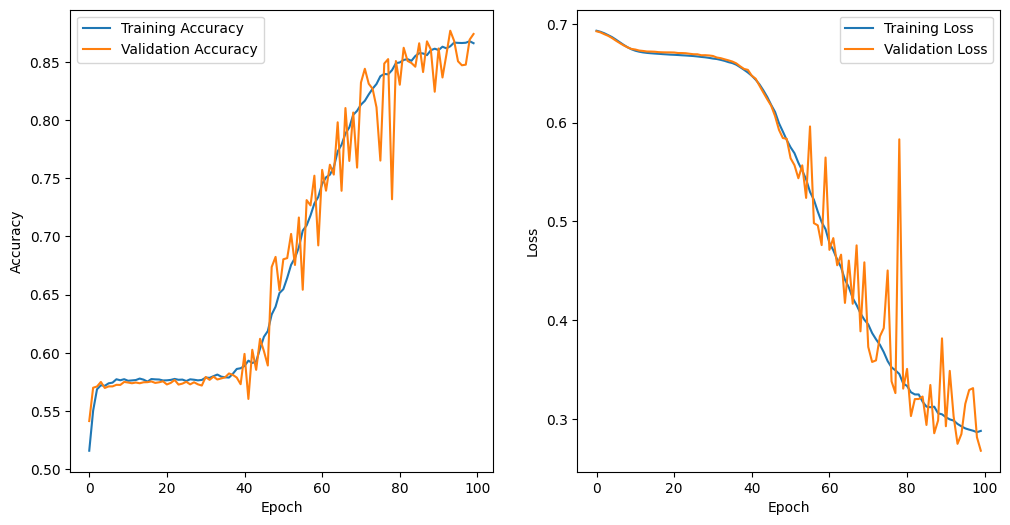

Best model saved with validation accuracy: 0.8770


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Plot accuracy and loss vs. epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model with the highest validation accuracy to Google Drive
best_model_index = np.argmax(history.history['val_accuracy'])
best_model = model2
best_model.save('/content/drive/MyDrive/best_model.h5')
print(f"Best model saved with validation accuracy: {history.history['val_accuracy'][best_model_index]:.4f}")

This part I just want to create a new dataset with 3 inputs and 3 outputs. You can just simply find a new dataset from websites like Kaggle. So you don't need to acctually do this part.

In [124]:
data.head

<bound method NDFrame.head of               0         1  2  3        x3
0      0.961109  0.576863  0  1 -0.450366
1      0.891752  0.619192  0  1 -0.426073
2      0.955889  0.729448  0  1 -0.576583
3      0.853500  0.875035  0  1 -0.611329
4      0.813265  0.865895  0  1 -0.571525
...         ...       ... .. ..       ...
48115  0.446643  0.498257  1  0  0.125564
48116  0.472144  0.464292  1  0  0.133957
48117  0.506385  0.576385  1  0 -0.011973
48118  0.467688  0.498673  1  0  0.104245
48119  0.552926  0.466761  1  0  0.051087

[48120 rows x 5 columns]>

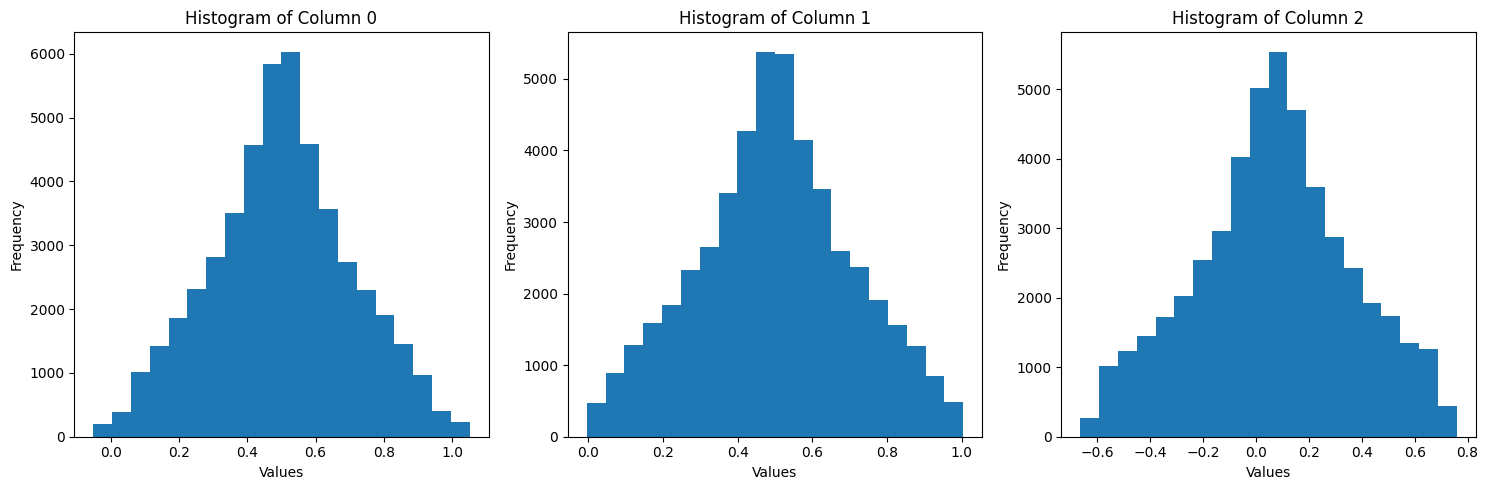

In [125]:
import math
data33 = data
# Here I am creating a new "x" using the previous x1 and x2
# In this way the new x (x3) will still have a connection with y1 and y2
data33['x3'] = data33.iloc[:, 0] + data33.iloc[:, 1] + 0.5
data33['x3'] = data33['x3'].apply(lambda x: math.cos(x))
data33.head

# Reordering columns
cols = list(data33.columns)
cols = cols[:2] + ['x3'] + cols[2:-1]
data33 = data33[cols]

# Assuming your DataFrame is named data33
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for subplots

# Plotting histograms for columns 0, 1, 2
for i in range(3):
    axs[i].hist(data33.iloc[:, i], bins=20)  # Adjust the number of bins as needed
    axs[i].set_title(f'Histogram of Column {i}')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots for better visibility
plt.show()

Here I just wanted to double check that Column 2 or new x (x3) is well distributed like the other inputs (Column 0 and Column 1), which it is!

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-126-20d0415d1994>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data33['fifth_column'] = (
<ipython-input-126-20d0415d1994>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

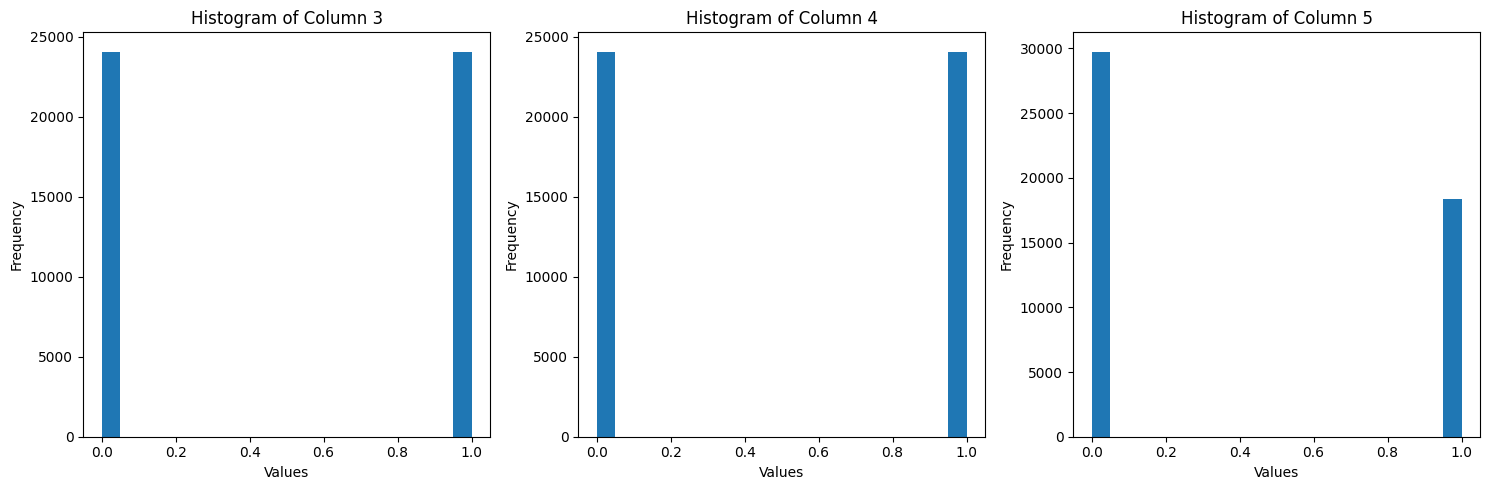

In [126]:
# now I need a new y with using x1, x2, and x3

# Define your complex non-linear function, for example:
def complex_function(x1, x2, x3):
    result = np.sin(x1) + np.log(x2) * np.sqrt(x3)  # Modify this function as needed
    return result

# Apply the function to columns 0, 1, 2 and add noise
data33['fifth_column'] = (
    complex_function(data33.iloc[:, 0], data33.iloc[:, 1], data33.iloc[:, 2]) +
    np.random.normal(loc=0, scale=0.1, size=len(data33))  # Adding some Gaussian noise
)


# Thresholding the values to be either 0 or 1
data33['fifth_column'] = (data33['fifth_column'] > data33['fifth_column'].mean()).astype(int)
data33.head

# Assuming your DataFrame is named data33
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for subplots

# Plotting histograms for columns 3,4,5
for i in range(3):
    axs[i].hist(data33.iloc[:, i+3], bins=20)  # Adjust the number of bins as needed
    axs[i].set_title(f'Histogram of Column {i+3}')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between subplots for better visibility
plt.show()

In [127]:
# Extract features (x1 and x2) and labels (y1 and y2)
features33 = data33.iloc[:, :3].values
labels33 = data33.iloc[:, 3:].values

# Divide the data33 into training and validation sets
X_train33, X_val33, y_train33, y_val33 = train_test_split(features33, labels33, test_size=0.2, random_state=42)

In [128]:
# Define the neural network architecture (model3)
model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),    # Input layer with two inputs (features x1 and x2)
    tf.keras.layers.Dense(50, activation='relu'),    # First hidden layer with 50 neurons and ReLU activation
    tf.keras.layers.Dense(40, activation='relu'),    # Second hidden layer with 40 neurons and ReLU activation
    tf.keras.layers.Dense(30, activation='relu'),    # Third hidden layer with 30 neurons and ReLU activation
    tf.keras.layers.Dense(20, activation='relu'),    # Fourth hidden layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='relu'),    # Fifth hidden layer with 10 neurons and ReLU activation
    tf.keras.layers.Dense(3, activation='softmax')   # Output layer with two outputs (labels y1 and y2) and softmax activation
])

# Compile the model3 with SGD optimizer and learning rate of 0.005
learning_rate = 0.005
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network (model3)
epochs = 200
batch_size = 32
history3 = model3.fit(X_train33, y_train33, epochs=epochs, batch_size=batch_size, validation_data=(X_val33, y_val33))

# Evaluate the model3 on the validation set
val_loss33, val_accuracy33 = model3.evaluate(X_val33, y_val33)
print(f"Validation loss: {val_loss33:.4f}, Validation accuracy: {val_accuracy33:.4f}")

Epoch 1/200
1203/1203 [==============================] - 3s 2ms/step - loss: 0.6862 - accuracy: 0.5149 - val_loss: 0.6835 - val_accuracy: 0.5213
Epoch 2/200
1203/1203 [==============================] - 3s 2ms/step - loss: 0.6805 - accuracy: 0.5292 - val_loss: 0.6804 - val_accuracy: 0.5681
Epoch 3/200
1203/1203 [==============================] - 2s 1ms/step - loss: 0.6772 - accuracy: 0.5621 - val_loss: 0.6772 - val_accuracy: 0.5645
Epoch 4/200
1203/1203 [==============================] - 2s 2ms/step - loss: 0.6696 - accuracy: 0.5494 - val_loss: 0.6635 - val_accuracy: 0.5447
Epoch 5/200
1203/1203 [==============================] - 2s 2ms/step - loss: 0.6530 - accuracy: 0.5450 - val_loss: 0.6443 - val_accuracy: 0.5382
Epoch 6/200
1203/1203 [==============================] - 2s 1ms/step - loss: 0.6290 - accuracy: 0.5548 - val_loss: 0.6163 - val_accuracy: 0.5481
Epoch 7/200
1203/1203 [==============================] - 2s 1ms/step - loss: 0.5982 - accuracy: 0.5630 - val_loss: 0.5836 - val_ac

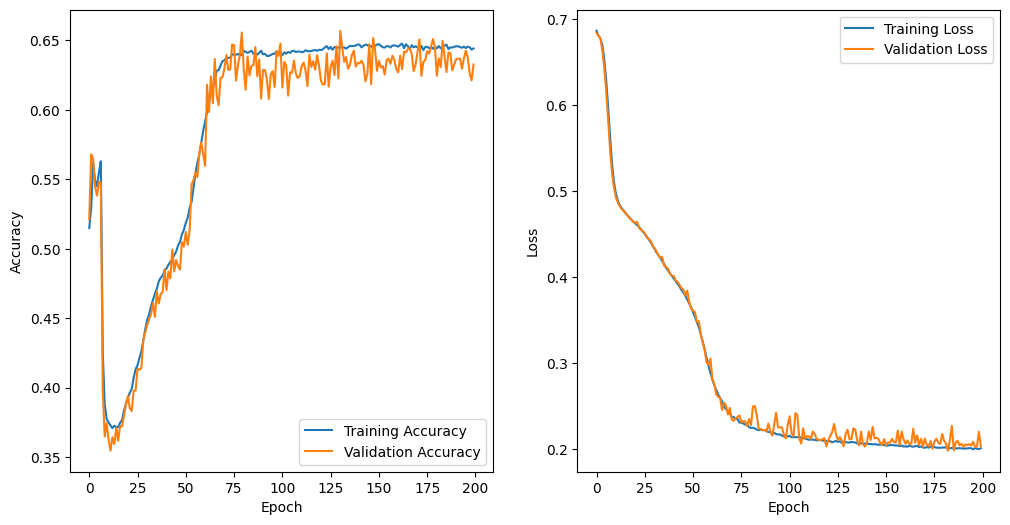

Best model saved with validation accuracy: 0.6570


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [129]:
# Plot accuracy and loss vs. epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model with the highest validation accuracy to Google Drive
best_model_index = np.argmax(history3.history['val_accuracy'])
best_model = model3
best_model.save('/content/drive/MyDrive/best_model33.h5')
print(f"Best model saved with validation accuracy: {history3.history['val_accuracy'][best_model_index]:.4f}")

In [130]:
#data33.to_csv('data33.txt', sep='\t', index=False)

In [135]:
# Format the first three columns with 15 digits after the decimal point
formatted_columns = data33.iloc[:, :3].applymap(lambda x: '{:.15f}'.format(x))

# Concatenate the formatted columns with the remaining columns
concatenated_data = pd.concat([formatted_columns, data33.iloc[:, 3:]], axis=1)

# Save concatenated DataFrame to a text file
concatenated_data.to_csv('data33.txt', sep='\t', index=False, header=False)
